In [1]:
import ema as em #V0.08
import numpy as np
import sympy as sp
sp.init_printing(use_latex=True)

In [4]:
divs = 16
length = 20
height = 5
E = 1000
I = 5
A = [10, 100, 1000, 10000]
areaIdx = 0

In [5]:
# P1.1 Model Definitions
p1 = em.Domain(2,3)
m1 = p1.material(E)
s1 = p1.xsec(1.0, I)

def y(x):
    a = -4*height/(length**2)
    b = 4*height/length
    y = a*x**2+ b*x
    return y

# Create nodes
for i in range(divs+1):
    x = i*length/divs
    p1.node('n'+str(i), x,  y(x))

# Create elems
for i, a in enumerate(p1.nodes[:-1]):
    b = p1.nodes[i+1]
    p1.beam('E'+str(i), a, b, m1, s1)
    
# Create reactions
p1.pin(p1.nodes[ 0])
p1.pin(p1.nodes[-1])

# Load
for node in p1.nodes[1:-1]:
    p1.nLoad(node, 'y', 10)

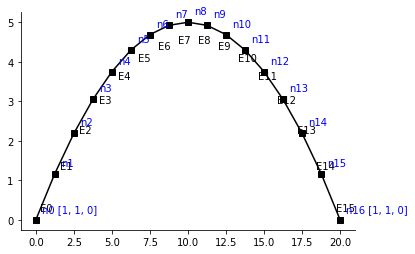

In [6]:
p1.plot_structure()

In [5]:
print(p1.nq())
print(p1.nf())
print(p1.NOS())

48
47
1
